In [1]:
%autosave 0
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font",size=22)

Autosave disabled


In [2]:
# Load data
def load_data(kind, name, subdir=""):
    df = pd.read_csv(os.path.join("/data", subdir, "{}_{}.csv".format(kind, name)))
    return df

nqueries_ = 9
running_times_imputedb_alt = load_data("running_times","imputedb","test2")
running_times_base_tables_alt = load_data("running_times","base_tables","test2")
running_times_imputedb_acs = load_data("running_times","imputedb","test5")
running_times_base_tables_acs = load_data("running_times","base_tables","test5")

In [3]:
running_times_base_tables_acs.head()

,Unnamed: 0,query,alpha,mean,std,plan_hash
0,0,0,0.0,21311241,0,-1368619563


In [4]:
running_times_imputedb_acs.head()

,Unnamed: 0,query,alpha,std,mean
0,0,0.0,0.0,1404.758942,4736.380
1,1,0.0,1.0,4.594401,1336.205


In [6]:
# Combine dataframes.
df1 = running_times_base_tables_acs
df2 = running_times_base_tables_alt
df3 = running_times_imputedb_acs
df4 = running_times_imputedb_alt

df1["query"] = nqueries_-1.0
df3["query"] = nqueries_-1.0
df1["alpha"] = "Impute at base tables"
running_times_combined = df1.append(df2).append(df3).append(df4)
running_times_combined_8 = df2.append(df4)

In [7]:
running_times_combined.head()

,Unnamed: 0,alpha,mean,plan_hash,query,std
0,0,Impute at base tables,2.131124e+07,-1.368620e+09,8.0,0.000000
0,0,Impute at base tables,6.423385e+03,NaN,0.0,30.590615
1,1,Impute at base tables,1.046105e+04,NaN,1.0,28.374257
2,2,Impute at base tables,1.047233e+04,NaN,2.0,38.754340
3,3,Impute at base tables,1.047220e+04,NaN,3.0,24.958115


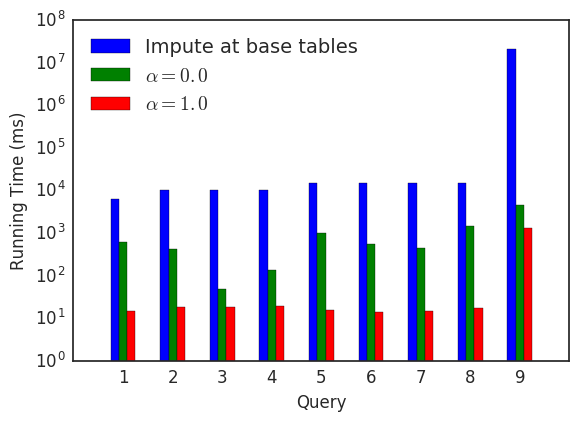

In [14]:
name = "combined"
kind = "running_times"
df = running_times_combined

# plots
xticks = range(0, nqueries)
xlabels = ["%i" % (q + 1) for q in xticks]

plt.figure()

df2 = df.copy()
df2 = df2.pivot(index="query",columns="alpha",values="mean")
df2 = df2[["Impute at base tables",0.0,1.0]]
df2 = df2.rename(columns={0.0: r"$\alpha = 0.0$", 1.0: r"$\alpha=1.0$"})
ax = df2.plot(kind="bar")
ax.set_yscale("log")
ax.set_ylim(bottom=0.99)
ax.legend(title=None,loc="best", fontsize=14)

xticks = range(0, len(df2))
xlabels = ["%i" % (q + 1) for q in xticks]
plt.xlim(xticks[0] - 1, xticks[-1] + 1)
plt.xticks(xticks, xlabels,rotation=0)

plt.xlabel('Query')
plt.ylabel("Running Time (ms)")

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
    
plt.savefig(os.path.join("/data/update", '{}_{}_bar.png'.format(kind, name)),bbox_inches='tight')

In [15]:
df2

alpha,Impute at base tables,$\alpha = 0.0$,$\alpha=1.0$
query,,,
0.0,6.423385e+03,633.240,14.875
1.0,1.046105e+04,430.870,18.875
2.0,1.047233e+04,49.440,18.135
3.0,1.047220e+04,139.835,19.155
4.0,1.553937e+04,989.285,15.480
5.0,1.554201e+04,566.220,14.570
6.0,1.553208e+04,458.565,15.300
7.0,1.555014e+04,1505.245,17.795
8.0,2.131124e+07,4736.380,1336.205


In [17]:
df2.to_csv(os.path.join("/data/update",'{}_{}_bar.csv'.format(kind, name)))